# 量子回路

## はじめに

このレッスンでは、計算の*量子回路*モデルを紹介します。これは、このシリーズ全体で使用する量子計算の標準的な説明です。

また、ベクトル間の*内積*、*直交性*と*正規直交性*の概念、標準基底測定を一般化する*射影*と*射影測定*など、いくつかの重要な数学的概念も紹介します。これらの概念を通じて、*量子複製不可能定理*や非直交量子状態を完全に識別することの不可能性など、量子情報に関する基本的な制限を導き出します。

## 1. 回路

コンピューター・サイエンスでは、*回路*は計算のモデルであり、情報は*ゲート*で繋がれたワイヤーにより運ばれます。ゲートは、ワイヤーによって運ばれる情報を変換する操作を表します。量子回路は、この一般的な概念に基づく計算モデルの一例にすぎません。

「回路」という言葉はしばしば巡回パスを指しますが、最も一般的な計算回路モデルでは巡回パスは実際には許可されていません。つまり、回路を計算モデルとして考える場合、通常は*非巡回回路*を取り上げます。量子回路はこのパターンに従います。すなわち、量子回路は何度でも実行できますが、量子回路自体は、フィードバック・ループを含めることができない有限の操作シーケンスを表します。

### 1.1 ブール回路

以下は (古典的な) ブール回路の例です。ワイヤーはバイナリー値を運び、ゲートはブール論理演算を表します。

![ブール回路の例](images/quantum-circuits/Boolean-circuit-XOR.png)

ワイヤーに沿った情報の流れは左から右に進みます: $\mathsf{X}$ および $\mathsf{Y}$ とラベル付けされた図の左側のワイヤーは入力ビットで、それぞれに選択したバイナリー値を何でも設定できます。右側のワイヤーは出力です。中間ワイヤーは、左から右に評価されるゲートによって決定される任意の値を取ります。

ゲートは、AND ゲート (ラベル $\wedge$ ) 、OR ゲート (ラベル $\vee$) 、および NOT ゲート (ラベル $\neg$) です。これらのゲートによって計算される関数は、おそらく多くの読者にとって馴染みのあるものでしょうが、ここでは値を表で表示しました。

$$
\rule[-10mm]{0mm}{15mm}
\begin{array}[t]{c|c}
  a & \neg a\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\hspace{1.5cm}
\begin{array}[t]{c|c}
  ab & a \wedge b\\
  \hline
  00 & 0\\
  01 & 0\\
  10 & 0\\
  11 & 1
\end{array}
\hspace{1.5cm}
\begin{array}[t]{c|c}
  ab & a \vee b\\
  \hline
  00 & 0\\
  01 & 1\\
  10 & 1\\
  11 & 1
\end{array}
$$

$\mathsf{X}$ と $\mathsf{Y}$ という名前のすぐ右にあるワイヤー上の 2 つの小さな円は、*ファンアウト*操作を表します。これは、表示されるワイヤー上で保持されている値のコピーを作成するだけで、この値を複数のゲートに入力できるようにするものです。ファンアウト操作は、古典的な設定では常にゲートと見なされるとは限りません — ある意味で「自由」であるかのように扱われることもあります — しかし、通常のブール回路を同等の量子回路に変換する方法を議論するときは、ファンアウト操作をゲートとして明示的に分類し、それらを正しく扱う必要があります。

これは、同じ回路を電気工学でより一般的なスタイルで表したもので、AND、OR、および NOT ゲートに従来の記号を使用しています。

![古典的なスタイルのブール回路](images/quantum-circuits/Boolean-circuit-classic.png)

このスタイルまたはこれらの特定のゲート記号をこれ以上使用することはありません。量子回路のゲートを表すためには、さまざまな異なる記号を使用します。これについては、出てきたときに説明します。

この例の回路は、シンボル $\oplus$ で示される*排他的 OR* (略して XOR) を計算します。

$$
\rule[-10mm]{0mm}{15mm}
\begin{array}[t]{c|c}
  ab & a \oplus b\\
  \hline
  00 & 0\\
  01 & 1\\
  10 & 1\\
  11 & 0
\end{array}
$$

次の図では、 $\mathsf{X}=0$ と $\mathsf{Y}=1$ という入力の 1 つの可能な選択のみを考えています。各ワイヤーは、それが運ぶ値によってラベル付けされているため、操作を追跡できます。この場合、出力値は $1$ です。これは XOR の正しい値です: $0 \oplus 1 = 1$。

![ブール回路の評価](images/quantum-circuits/XOR-circuit-evaluate.png)

同様の方法で、他に可能な3つの入力を確認できます。

### 1.2 その他の回路

上記のように、コンピューター・サイエンスにおける回路の概念は非常に一般的です。たとえば、ワイヤーが $0$ と $1$ 以外の値を運ぶ回路は、異なる選択をした操作を表すゲートと同様に、研究されることがあります。

例えば*演算回路*では、ワイヤーは整数値を運ぶことができ、ゲートは加算や乗算などの演算操作を表すことができます。次の図は、2 つの変数入力値 ($x$ および $y$ ) と、値 $1$ に設定された 3 番目の入力値を受け取る演算回路を示しています。 $x$ と $y$ の値の関数として、ワイヤーによって運ばれる値を図に示します。

![演算回路の例](images/quantum-circuits/arithmetic-circuit.png)

また、ゲートが確率的操作を表す回路など、ランダム性を組み込んだ回路を考えることもできます。

### 1.3 量子回路

量子回路モデルでは、ワイヤーは量子ビットを表し、ゲートはこれらの量子ビットに作用する操作を表します。ここでは、これまでに遭遇した操作、つまり*ユニタリー操作*と*標準基底測定*に焦点を当てます。他の種類の量子操作と測定について学ぶにつれて、それに応じてモデルを強化します。

量子回路の簡単な例を次に示します。

![簡単な量子回路](images/quantum-circuits/simple-quantum-circuit.png)

この回路には、水平な直線で表される $\mathsf{X}$ という名前の 1 つの量子ビットと、この量子ビットのユニタリー操作を表す一連のゲートがあります。上記の例と同様に、情報の流れは左から右に進みます。つまり、実行される最初の操作はアダマール、2 番目は $S$ 操作、3 番目は別のアダマール、最後の操作は $T$ です。したがって、回路全体を適用すると、これらの操作の合成 である $THSH$ が量子ビット $\mathsf{X}$ に適用されます。

回路への入力または出力の状態を明示的に示したい場合があります。たとえば、 $THSH$ を状態 $\vert 0\rangle$ に適用すると、状態 $\frac{1+i}{2}\vert 0\rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle$ が得られます。これを次のように表します。

![単純な量子回路の評価](images/quantum-circuits/simple-quantum-circuit-evaluated.png)

この場合のように、量子回路ではすべての量子ビットが $\vert 0\rangle$ に初期化されることがよくありますが、入力量子ビットを異なる状態に設定したい場合もあります。

では、Qiskitでこの回路をどのように指定するか、まず現在のセクションに必要なインポートから見ていきましょう。

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

まず、左から右へとゲートを順次追加していくことで、次のような回路を作ることができます。

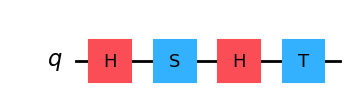

In [2]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw("mpl"))

Qiskit の量子ビットのデフォルト名は、 $\mathsf{q_0}$ 、 $\mathsf{q_1}$ 、 $\mathsf{q_2}$ などです。今回の例のように1量子ビットだけの場合は、名前は $\mathsf{q_0}$ ではなく $\mathsf{q}$ です。独自の名前を指定したい場合は、次のように `QuantumRegister` クラスを使用します。

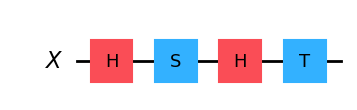

In [3]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw("mpl"))

量子回路の別の例を次に示します。今回は 2 つの量子ビットを使用します。

![ebitを作る量子回路](images/quantum-circuits/ebit-circuit.png)

いつものように、 $H$ とラベル付けされたゲートはアダマール操作を指しますが、2 番目のゲートは 2 量子ビット・ゲートです。これは *制御NOT* 操作であり、黒丸は制御量子ビットを表し、記号 $\oplus$ に似た円はターゲット量子ビットを示します。

この回路を詳しく調べてその機能を説明する前に、量子回路で量子ビットがどのように順序付けられているかを明確にすることが不可欠です。

<!-- ::: q-block.note.info -->

**量子回路での量子ビットの順序付け:** Qiskitでは、回路の最上位の量子ビットはインデックス 0 を持ち、デカルト積またはテンソル積の右端の位置に対応します。上から 2 番目の量子ビットはインデックス 1 を持ち、デカルト積またはテンソル積などの右から 2 番目の位置に対応し、最大のインデックスを持ち、デカルト積またはテンソル積で最も左の位置に対応する一番下の量子ビットまで順に続きます。

したがって、例えば0 番目の位置にある量子ビットを参照する場合、回路図の一番上の量子ビット、または量子状態ベクトルの式の右端の量子ビットを参照しています。1 番目の位置の量子ビットは、回路図では上から 2 番目、量子状態ベクトルでは右から 2 番目です。このインデックス付け規則は、リトル・エンディアン・インデックス付けとして知られています。これは、数値の 2 進表現におけるビットの重要性を考えたとき、インデックスが「リトル・エンド」から始まるためです。

<!-- ::: -->

したがって、上記では2 つの量子ビット $(\mathsf{X},\mathsf{Y})$ に対して操作する回路を考えています。入力が $\vert \psi\rangle \vert \phi\rangle$ の場合、下の量子ビット ($\mathsf{X}$) は状態 $\vert \psi\rangle$ で始まり、上の量子ビット ( $\mathsf{Y}$) は状態 $\vert \phi\rangle$ で始まります。

次に、回路自体を見てみましょう。左から右に操作を進めて、回路が何をするかを見てみましょう。

1. 最初の操作は、 $\mathsf{Y}$ に対するアダマール操作です。

   ![e-bit作成の最初の操作](images/quantum-circuits/ebit-circuit-first.png)

   このように単一の量子ビットにゲートを適用すると、他の量子ビットには何も起こりません。何も起こらないことは、恒等操作と同等です。この回路には、他に $\mathsf{X}$ という 1 つの量子ビットしかないため、上の図の点線の四角形はこの操作を表しています。

   $$
     \mathbb{1}\otimes H
     = \begin{pmatrix}
     \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
     \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0\\
     0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
     0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
     \end{pmatrix}.
   $$

   恒等行列はテンソル積の左側にあり、 $H$ は右側にあることに注意してください。これは、Qiskit の量子ビットの順序と一致しています。

2. 2番目の操作は制御NOT操作です。 $\mathsf{Y}$ が制御ビットで、 $\mathsf{X}$ がターゲットです。

   ![e-bit作成の2番目の操作](images/quantum-circuits/ebit-circuit-second.png)

   標準基底状態に対する制御 NOT ゲートの動作は次のとおりです。

   ![制御 NOT ゲート](images/quantum-circuits/cNOT.png)

   量子ビットを $(\mathsf{X}, \mathsf{Y})$ のように並べると、制御 NOT ゲートの行列表現は次のようになります。

   $$
     \begin{pmatrix}
     1 & 0 & 0 & 0\\[2mm]
     0 & 0 & 0 & 1\\[2mm]
     0 & 0 & 1 & 0\\[2mm]
     0 & 1 & 0 & 0
     \end{pmatrix}.
   $$

$U$ と呼ぶ回路全体のユニタリー操作は、これらの操作の合成です。

$$
U = \begin{pmatrix}
1 & 0 & 0 & 0\\[2mm]
0 & 0 & 0 & 1\\[2mm]
0 & 0 & 1 & 0\\[2mm]
0 & 1 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0\\
0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0
\end{pmatrix}.
$$

特に、ベル状態の表記法を思い出すと、

$$
\begin{aligned}
  \vert \phi^+ \rangle & = \frac{1}{\sqrt{2}} \vert 0 0 \rangle 
                         + \frac{1}{\sqrt{2}} \vert 1 1 \rangle \\[1mm]
  \vert \phi^- \rangle & = \frac{1}{\sqrt{2}} \vert 0 0 \rangle 
                         - \frac{1}{\sqrt{2}} \vert 1 1 \rangle \\[1mm]
  \vert \psi^+ \rangle & = \frac{1}{\sqrt{2}} \vert 0 1 \rangle 
                         + \frac{1}{\sqrt{2}} \vert 1 0 \rangle \\[1mm]
  \vert \psi^- \rangle & = \frac{1}{\sqrt{2}} \vert 0 1 \rangle 
                         - \frac{1}{\sqrt{2}} \vert 1 0 \rangle,
\end{aligned}
$$

以下が得られます。

$$
\begin{aligned}
U \vert 00\rangle & = \vert \phi^+\rangle\\
U \vert 01\rangle & = \vert \phi^-\rangle\\
U \vert 10\rangle & = \vert \psi^+\rangle\\
U \vert 11\rangle & = -\vert \psi^-\rangle.
\end{aligned}
$$

したがって、この回路を $\vert 00\rangle$ に初期化された 2量子ビットで実行すると、状態 $\vert\phi^+\rangle$ を作成することができます。より一般的に言うと、標準基底をベル基底に変換する方法を提供しているのです。 (最終状態 $-\vert \psi^-\rangle$ の $-1$ の位相係数は、必要に応じて、制御 $Z$ ゲートを最初に追加するか、スワップ・ゲートを最後に追加することで、削除できます。）

一般に、量子回路には任意の数の量子ビット・ワイヤーを含めることができます。また、この例のように二重線で示される古典ビット・ワイヤーを含めることもできます。

![測定を含む回路例](images/quantum-circuits/ebit-circuit-measured.png)

この回路では、前の例と同様に、2 つの量子ビット $\mathsf{X}$ と $\mathsf{Y}$ にアダマール・ゲートと制御NOT ゲートがあります。 $\mathsf{A}$ と $\mathsf{B}$ の 2 つの*古典的な*ビットと、2 つの測定ゲートもあります。測定ゲートは、標準基底測定を表します。量子ビットは測定済みの状態に変更され、測定結果は矢印が指す古典ビットに*上書きされます*。

Qiskit を使用したこの回路の実装は次のとおりです。

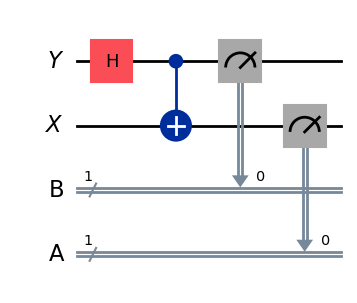

In [4]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw("mpl"))

/var/folders/z_/wh262lbd0y3525732h4t_4d00000gn/T/ipykernel_18184/1530918655.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit).result()


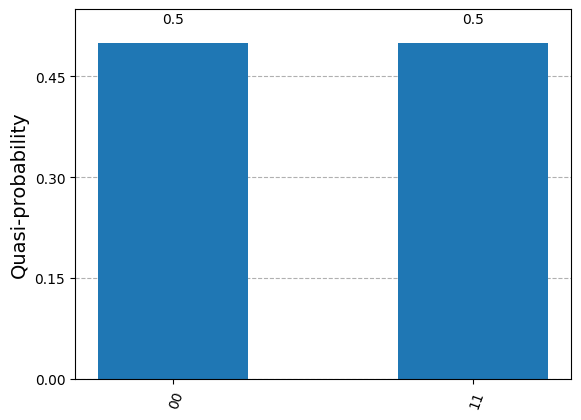

In [5]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

(測定後の状態で量子ビットを出力し、結果を別の古典ビットに書き込むのではなく) 量子ビットを入力として受け取り、古典的なビットを出力するゲートとして測定を表すと便利な場合があります 。これは、測定された量子ビットが破棄され、その後安全に無視できることを意味します。

たとえば、次の回路図は前の図と同じプロセスを表していますが、測定後に $\mathsf{X}$ と $\mathsf{Y}$ を無視します。

![コンパクトな測定を含む回路例](images/quantum-circuits/ebit-circuit-measured-compact.png)

このシリーズが続くにつれて、より多くの量子回路、上記の単純な例よりもはるかに複雑な回路の例が表示されます。一般的なゲートの記号を次に示します。

- 単一量子ビット・ゲートは通常、次のように、どの操作であるかを示す文字が付いた正方形として表示されます。

  ![単一量子ビット・ゲート](images/quantum-circuits/single-qubit-gates.png)

    Not ゲート ($X$ ゲートとも呼ばれます) は、プラス記号の周りに円を描いたもので示される場合もあります。

  ![Not ゲート](images/quantum-circuits/not-gate.png)

- スワップ・ゲートは次のように表されます。

  ![スワップ・ゲート](images/quantum-circuits/swap-gate.png)

    制御されたユニタリー操作を記述するゲートである制御ゲートは、制御されている操作に垂直線で接続された黒丸 (制御を示す) で示されます。たとえば、制御NOT ゲート、制御・制御NOT (または Toffoli) ゲート、および制御スワップ (Fredkin) ゲートは、次のように表されます。

  ![制御ゲート](images/quantum-circuits/controlled-gates.png)

- 複数量子ビットに対する任意のユニタリー操作は、ゲートと見なすことができます。それらは、ユニタリー操作の名前でラベル付けされた長方形で表されます。たとえば、以下はゲートとしての (不特定の) ユニタリー操作 $U$ と、このゲートの制御されたバージョンを表しています:

  ![任意のユニタリー・ゲートとその制御バージョン](images/quantum-circuits/uncontrolled-and-controlled-unitary.png)

## 2. 内積、正規直交性、射影

量子回路の機能と制限を探求する準備を整えるために、いくつかの追加の数学的概念を紹介します。つまり、ベクトル間の*内積*(およびユークリッド・ノルムとの関係)、ベクトル集合の*直交性*と*正規直交性*の概念、および標準基底測定を便利に一般化できる*射影*行列です。

### 2.1 内積

レッスン 1 を思い出してください。Dirac 表記を使用して任意の列ベクトルを ケットとして表現する場合、次のようになります。

$$
\vert \psi \rangle =
\begin{pmatrix}
\alpha_1\\
\alpha_2\\
\vdots\\
\alpha_n
\end{pmatrix},
$$

対応するブラ・ベクトルは、このベクトルの*共役転置*です。

$$
\langle \psi \vert = \bigl(\vert \psi \rangle \bigr)^{\dagger}
=
\begin{pmatrix}
\overline{\alpha_1} & \overline{\alpha_2} & \cdots & \overline{\alpha_n}
\end{pmatrix}.
\tag{1}
$$

あるいは、古典的状態の集合 $\Sigma$ を念頭に置き、列ベクトルを次のように ケット として表現するとします。

$$
\vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle,
$$

このとき、対応する行 (またはブラ) ベクトルは共役転置になります。

$$
\langle \psi \vert = \sum_{a\in\Sigma} \overline{\alpha_a} \langle a \vert.
\tag{2}
$$

また、1 つの行または 1 つの列をもつ行列として表示される ブラ・ベクトルと ケット・ベクトルの積がスカラーになることも見てきました。具体的には、2 つの (列) ベクトルがある場合

$$
\vert \psi \rangle =
\begin{pmatrix}
\alpha_1\\
\alpha_2\\
\vdots\\
\alpha_n
\end{pmatrix}
\quad\text{and}\quad
\vert \phi \rangle =
\begin{pmatrix}
\beta_1\\
\beta_2\\
\vdots\\
\beta_n
\end{pmatrix},
$$

すなわち、行ベクトル $\langle \psi \vert$ が式 $(1)$ のようになるので、以下の通りです。

$$
\langle \psi \vert \phi \rangle = \langle \psi \vert \vert \phi \rangle
=
\begin{pmatrix}
\overline{\alpha_1} & \overline{\alpha_2} & \cdots & \overline{\alpha_n}
\end{pmatrix}
\begin{pmatrix}
\beta_1\\
\beta_2\\
\vdots\\
\beta_n
\end{pmatrix}
=
\overline{\alpha_1} \beta_1 + \cdots + \overline{\alpha_n}\beta_n.
$$

あるいは、次のように記述した 2 つの列ベクトルがある場合

$$
\vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
\quad\text{and}\quad
\vert \phi \rangle = \sum_{b\in\Sigma} \beta_b \vert b \rangle,
$$

$\langle \psi \vert$ が行ベクトル $(2)$ であるため、以下が得られます。

$$
\begin{aligned}
  \langle \psi \vert \phi \rangle & = \langle \psi \vert \vert \phi \rangle\\
  & =
  \Biggl(\sum_{a\in\Sigma} \overline{\alpha_a} \langle a \vert\Biggr)
  \Biggl(\sum_{b\in\Sigma} \beta_b \vert b\rangle\Biggr)\\
  & =
  \sum_{a\in\Sigma}\sum_{b\in\Sigma} \overline{\alpha_a} \beta_b \langle a \vert b \rangle\\
  & = \sum_{a\in\Sigma} \overline{\alpha_a} \beta_a,
\end{aligned}
$$

ここで、$a\not=b$ を満たす古典的な状態 $a$ と $b$ に対して、 $\langle a \vert a \rangle = 1$ と $\langle a \vert b \rangle = 0$ という観測結果から、最後の等式が導き出されます。

値 $\langle \psi \vert \phi \rangle$ は、ベクトル $\vert \psi\rangle$ と $\vert \phi \rangle$ の間の*内積*と呼ばれます。内積は、量子情報と計算において非常に重要です。この基本的な概念がなければ、量子情報を数学レベルで理解することはできません。

ここで、ベクトルの内積に関するいくつかの基本的な事実をまとめてみましょう。

1. **ユークリッド・ノルムとの関係。** 任意のベクトルの

    $$
       \vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
       $$

    それ自身との内積は次のようになります。

    $$
       \langle \psi \vert \psi \rangle
       = \sum_{a\in\Sigma} \overline{\alpha_a} \alpha_a
       = \sum_{a\in\Sigma} \vert\alpha_a\vert^2
       = \bigl\| \vert \psi \rangle \bigr\|^2.
       $$

    すなわち、ベクトルのユークリッド・ノルムは次のように表すこともできます。

    $$
       \bigl\| \vert \psi \rangle \bigr\| = \sqrt{ \langle \psi \vert \psi \rangle }.
       $$

    ベクトルのユークリッド・ノルムは常に非負の実数でなければならないことに注意してください。さらに、ベクトルのユークリッド・ノルムがゼロに等しくなる唯一の方法は、エントリーのすべてがゼロに等しい場合です。つまり、ベクトルがゼロ・ベクトルであるということです。

    これらの観測結果を、すべてのベクトル $\vert \psi \rangle$ に対して、次のように要約できます:

    $$
       \langle \psi \vert \psi \rangle \geq 0,
       $$

    $\langle \psi \vert \psi \rangle = 0$ となるのは $\vert \psi \rangle = 0$ の場合のみです。内積のこの特性は、*正定性*と呼ばれることもあります。

2. **共役対称性。** 任意の 2 つのベクトル

    $$
       \vert \psi \rangle = \sum_{a\in\Sigma} \alpha_a \vert a \rangle
       \quad\text{and}\quad
       \vert \phi \rangle = \sum_{b\in\Sigma} \beta_b \vert b \rangle,
       $$

    について

    $$
       \langle \psi \vert \phi \rangle = \sum_{a\in\Sigma} \overline{\alpha_a} \beta_a
       \quad\text{and}\quad
       \langle \phi \vert \psi \rangle = \sum_{a\in\Sigma} \overline{\beta_a} \alpha_a,
       $$

    このとき、以下の通りです。

    $$
       \overline{\langle \psi \vert \phi \rangle} = \langle \phi \vert \psi \rangle.
       $$

3. **2 番目の引数の線形性 (および最初の引数の共役線形性)。** $\vert \psi \rangle$ 、 $\vert \phi_1 \rangle$ 、 $\vert \phi_2 \rangle$ をベクトル、 $\alpha_1$ と $\alpha_2$ を複素数として、新しいベクトルを定義します。

    $$
       \vert \phi\rangle = \alpha_1 \vert \phi_1\rangle + \alpha_2 \vert \phi_2\rangle,
       $$

    このとき

    $$
       \langle \psi \vert \phi \rangle
       = \langle \psi \vert \bigl( \alpha_1\vert \phi_1 \rangle + \alpha_2\vert \phi_2 \rangle\bigr)
       = \alpha_1 \langle \psi \vert \phi_1 \rangle + \alpha_2 \langle \psi \vert \phi_2 \rangle.
       $$

    つまり、内積は 2 番目の引数で*線形*です。これは、上記の式を使用するか、各引数 (特に 2 番目の引数) で行列の乗算が線形であることを確認するだけで確認できます。

    この事実を共役対称性と組み合わせると、最初の引数で内積が*共役線形*であることが明らかになります。つまり、 $\vert \psi_1 \rangle$ 、 $\vert \psi_2 \rangle$ 、および $\vert \phi \rangle$ がベクトルで、 $\alpha_1$ と $\alpha_2$ が複素数である場合、

    $$
       \vert \psi \rangle = \alpha_1 \vert \psi_1\rangle + \alpha_2 \vert \psi_2 \rangle,
       $$

    このとき

    $$
       \langle \psi \vert \phi \rangle
       =
       \bigl( \overline{\alpha_1} \langle \psi_1 \vert + \overline{\alpha_2} \langle \psi_2 \vert \bigr)
       \vert\phi\rangle
       = \overline{\alpha_1} \langle \psi_1 \vert \phi \rangle + \overline{\alpha_2} \langle \psi_2 \vert \phi \rangle.
       $$

4. **コーシー・シュワルツの不等式。** 同じ数のエントリーを持つすべてのベクトル $\vert \phi \rangle$ と $\vert \psi \rangle$ に対して、次のようになります。

    $$
       \bigl\vert \langle \psi \vert \phi \rangle\bigr| \leq \bigl\| \vert\psi \rangle \bigr\| \bigl\| \vert \phi \rangle
       \bigr\|.
       $$

    これは非常に便利な不等式で、量子情報 (および他の多くの研究分野) で非常に広く使用されています。

### 2.2 直交集合と正規直交集合

2 つのベクトル $\vert \phi \rangle$ と $\vert \psi \rangle$ の内積がゼロの場合、*直交*していると言われます。

$$
\langle \psi \vert \phi \rangle = 0.
$$

幾何学的に、直交ベクトルは互いに直角なベクトルと考えることができます。

ベクトル集合 $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ において、集合内のすべてのベクトルが集合内の他のすべてのベクトルに直交する場合、*直交集合*と呼ばれます。つまり、この集合は次の場合に直交します。

$$
\langle \psi_j \vert \psi_k\rangle = 0
$$

ここで、 $j\not=k$ である $j,k\in{1,\ldots,m}$ 全ての組み合わせです。

ベクトルの集合 $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ が*直交*集合であり、さらに集合内のすべてのベクトルが単位ベクトルである場合、正規直交集合と呼ばれます。あるいは、次の場合、この集合は正規直交集合です。

$$
\langle \psi_j \vert \psi_k\rangle =
\begin{cases}
1 & j = k\\
0 & j\not=k
\end{cases}
$$
$$
\tag{3}$$
ここで $j,k\in{1,\ldots,m}$ のすべての組み合わせです。

最後に、集合 $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ が、正規直交集合であることに加えて基底を形成する場合、*正規直交基底*と言います。これは、 $\{ \vert \psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ が正規直交集合であり、 $\vert \psi_1\rangle,\ldots,\vert\psi_m\rangle$  が描画する空間の次元 $m$ に等しいことに相当します。

たとえば、任意の古典状態の集合 $\Sigma$ に対して、すべての標準基底ベクトル集合

$$
\big\{ \vert a \rangle \,:\, a\in\Sigma\bigr\}
$$

は正規直交基底です。集合 $\{\vert+\rangle,\vert-\rangle\}$ は、単一量子ビットに対応する $2$ 次元空間の正規直交基底であり、ベル基底 $\{\vert\phi^+\rangle, \vert\phi^-\rangle, \vert\psi^+\rangle, \vert\psi^-\rangle\}$ は、2量子ビットに対応する $4$ 次元空間の正規直交基底です。

#### 正規直交集合と正規直交基底の拡張

$\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle$ が $n$ 次元空間に存在するベクトルであり、さらに  $\{\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle\}$  は正規直交集合と仮定します。正規直交集合は常に線形独立集合であるため、これらのベクトルは必ず $m$ 次元の部分空間を張ります。このことから、$m\leq n$ とすぐに結論付けられます。これは、これらのベクトルがまたがる部分空間の次元が、それらが描画される空間全体の次元よりも大きくなることはできないためです。

$m<n$ の場合、追加の $n-m$ ベクトル $\vert \psi_{m+1}\rangle,\ldots,\vert\psi_n\rangle$ を構築することが常に可能です。 このとき $\{\vert\psi_1\rangle,\ldots,\vert\psi_n\rangle\}$ は正規直交基底を形成します。*グラム*–*シュミット直交化プロセス*として知られる手順を使用して、これらのベクトルを構築できます。

##### 正規直交集合とユニタリー行列

ベクトルの正規直交集合は、ユニタリー行列と密接に関連しています。この関係を表現する 1 つの方法は、任意の正方行列 $U$ について、次の 3 つのステートメントが論理的に同等である (すべて真またはすべて偽であることを意味する) ということです。

1. 行列 $U$ はユニタリーです (つまり、$U^{\dagger} U = \mathbb{1} = UU^{\dagger}$)。
2. $U$ の行は正規直交集合を形成します。
3. $U$ の列は正規直交集合を形成します。

この等価性は、行列の乗算と共役転置がどのように機能するかを考えると、実際には非常に簡単です。たとえば、次のような $3\times 3$ 行列があるとします。

$$
U = \begin{pmatrix}
\alpha_{1,1} & \alpha_{1,2} & \alpha_{1,3} \\
\alpha_{2,1} & \alpha_{2,2} & \alpha_{2,3} \\
\alpha_{3,1} & \alpha_{3,2} & \alpha_{3,3}
\end{pmatrix}
$$

$U$ の共役転置は次のようになります。

$$
U^{\dagger} = \begin{pmatrix}
\overline{\alpha_{1,1}} & \overline{\alpha_{2,1}} & \overline{\alpha_{3,1}} \\
\overline{\alpha_{1,2}} & \overline{\alpha_{2,2}} & \overline{\alpha_{3,2}} \\
\overline{\alpha_{1,3}} & \overline{\alpha_{2,3}} & \overline{\alpha_{3,3}}
\end{pmatrix}
$$

左側の共役転置を使用して 2 つの行列を乗算すると、次の行列が得られます。

$$
\begin{aligned}
&\begin{pmatrix}
\overline{\alpha_{1,1}} & \overline{\alpha_{2,1}} & \overline{\alpha_{3,1}} \\
\overline{\alpha_{1,2}} & \overline{\alpha_{2,2}} & \overline{\alpha_{3,2}} \\
\overline{\alpha_{1,3}} & \overline{\alpha_{2,3}} & \overline{\alpha_{3,3}}
\end{pmatrix}
\begin{pmatrix}
\alpha_{1,1} & \alpha_{1,2} & \alpha_{1,3} \\
\alpha_{2,1} & \alpha_{2,2} & \alpha_{2,3} \\
\alpha_{3,1} & \alpha_{3,2} & \alpha_{3,3}
\end{pmatrix}\\[2mm]
\qquad &=
{\scriptsize
\begin{pmatrix}
\overline{\alpha_{1,1}}\alpha_{1,1} + \overline{\alpha_{2,1}}\alpha_{2,1} + \overline{\alpha_{3,1}}\alpha_{3,1} &
\overline{\alpha_{1,1}}\alpha_{1,2} + \overline{\alpha_{2,1}}\alpha_{2,2} + \overline{\alpha_{3,1}}\alpha_{3,2} &
\overline{\alpha_{1,1}}\alpha_{1,3} + \overline{\alpha_{2,1}}\alpha_{2,3} + \overline{\alpha_{3,1}}\alpha_{3,3} \\[1mm]
\overline{\alpha_{1,2}}\alpha_{1,1} + \overline{\alpha_{2,2}}\alpha_{2,1} + \overline{\alpha_{3,2}}\alpha_{3,1} &
\overline{\alpha_{1,2}}\alpha_{1,2} + \overline{\alpha_{2,2}}\alpha_{2,2} + \overline{\alpha_{3,2}}\alpha_{3,2} &
\overline{\alpha_{1,2}}\alpha_{1,3} + \overline{\alpha_{2,2}}\alpha_{2,3} + \overline{\alpha_{3,2}}\alpha_{3,3} \\[1mm]
\overline{\alpha_{1,3}}\alpha_{1,1} + \overline{\alpha_{2,3}}\alpha_{2,1} + \overline{\alpha_{3,3}}\alpha_{3,1} &
\overline{\alpha_{1,3}}\alpha_{1,2} + \overline{\alpha_{2,3}}\alpha_{2,2} + \overline{\alpha_{3,3}}\alpha_{3,2} &
\overline{\alpha_{1,3}}\alpha_{1,3} + \overline{\alpha_{2,3}}\alpha_{2,3} + \overline{\alpha_{3,3}}\alpha_{3,3}
\end{pmatrix}}
\end{aligned}
$$

$U$ の列から 3 つのベクトルを作成すると、

$$
\vert \psi_1\rangle = \begin{pmatrix}
\alpha_{1,1}\\
\alpha_{2,1}\\
\alpha_{3,1}
\end{pmatrix},
\quad
\vert \psi_2\rangle = \begin{pmatrix}
\alpha_{1,2}\\
\alpha_{2,2}\\
\alpha_{3,2}
\end{pmatrix},
\quad
\vert \psi_3\rangle =
\begin{pmatrix}
\alpha_{1,3}\\
\alpha_{2,3}\\
\alpha_{3,3}
\end{pmatrix},
$$

上記の積を次のように表現することもできます。

$$
U^{\dagger} U =
\begin{pmatrix}
\langle \psi_1\vert \psi_1 \rangle & \langle \psi_1\vert \psi_2 \rangle & \langle \psi_1\vert \psi_3 \rangle \\
\langle \psi_2\vert \psi_1 \rangle & \langle \psi_2\vert \psi_2 \rangle & \langle \psi_2\vert \psi_3 \rangle \\
\langle \psi_3\vert \psi_1 \rangle & \langle \psi_3\vert \psi_2 \rangle & \langle \psi_3\vert \psi_3 \rangle 
\end{pmatrix}
$$

式 (3) を参照すると、この行列が恒等行列と等しいという条件は、集合 $\{\vert\psi_1\rangle,\vert\psi_2\rangle,\vert\psi_3\rangle\}$ の正規直交性と等価であることがわかります。

この引数は、任意のサイズのユニタリー行列に一般化されます。行列がユニタリーである場合にのみ、行列の行が正規直交基底を形成するという事実は、その転置がユニタリーである場合にのみ行列がユニタリーであるという事実から導かれます。

上記の等価性と、すべての直交正規集合を拡張して正規直交基底を形成できるという事実を考慮すると、次の有用な事実を結論付けることができます。 $n$ 次元の空間で描ける $\{\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle\}$ 集合が与えられた時、最初の $m$ 列がベクトル $\vert\psi_1\rangle,\ldots,\vert\psi_m\rangle$ であるユニタリー行列 $U$ が存在します。絵的に表すと、次の形式を持つユニタリー行列を常に見つけることができます。

$$
U =
\left(
  \begin{array}{ccccccc}
    \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt}\\
    \vert\psi_1\rangle & \vert\psi_2\rangle & \cdots & \vert\psi_m\rangle & \vert\psi_{m+1}\rangle & 
    \cdots & \vert\psi_n\rangle\\
    \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt} & \rule{0.4pt}{10pt} & & \rule{0.4pt}{10pt}
  \end{array}
\right).
$$

ここで、最後の $n-m$ 列には、正規直交基底 $\{\vert\psi_1\rangle,\ldots,\vert\psi_n\rangle\}$ の、いずれか $\vert\psi_{m+1}\rangle,\ldots,\vert\psi_n\rangle$ が入ります。

### 2.3 射影と射影測定

#### 射影行列

正方行列 $\Pi$ は、次の 2 つの性質を満たす場合、*射影*と呼ばれます。

1. $\Pi = \Pi^{\dagger}$.
2. $\Pi^2 = \Pi$.

最初の条件 (それ自身の共役転置に等しい) を満たす行列は*エルミート行列*と呼ばれ、2 番目の条件 (2 乗しても変化しない) を満たす行列は*べき等*行列と呼ばれます。

注意として、*射影*という言葉は、必ずしも最初の条件を必要とせず、2 番目の条件のみを満たす任意の行列を指すために使用されることがあります。この場合、両方の特性を満たす行列を指すために*直交射影*という用語が通常使用されます。ただし、このシリーズでは、両方の条件を満たす行列を*射影*と*射影行列*という用語を使用して表現します。

射影の例は以下の行列です

$$
\Pi = \vert \psi \rangle \langle \psi \vert
\tag{4}
$$

ここで $\vert \psi\rangle$ は任意の単位ベクトルです。次のように、この行列がエルミート行列であることがわかります。

$$
\Pi^{\dagger} = \bigl( \vert \psi \rangle \langle \psi \vert \bigr)^{\dagger}
= \bigl( \langle \psi \vert \bigr)^{\dagger}\bigl( \vert \psi \rangle \bigr)^{\dagger}
= \vert \psi \rangle \langle \psi \vert = \Pi.
$$

ここで2 番目の等式を取得するために、次の式を使用しました。

$$
(A B)^{\dagger} = B^{\dagger} A^{\dagger},
$$

(積 $AB$ が意味を持つ任意の 2 つの行列 $A$ と $B$ に対して)これは常に真です 。

$(4)$ の行列 $\Pi$ がべき等であることを確認するには、 $\vert\psi\rangle$ が単位ベクトルであるという仮定を使用すると、 $\langle \psi \vert \psi\rangle = 1$ が満たされます。  したがって、

$$
\Pi^2
= \bigl( \vert\psi\rangle\langle \psi\vert \bigr)^2
= \vert\psi\rangle\langle \psi\vert\psi\rangle\langle\psi\vert
= \vert\psi\rangle\langle\psi\vert = \Pi.
$$

より一般的には、 $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$ がベクトルの正規直交集合である場合、行列

$$
\Pi = \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert
\tag{5}
$$

は射影です。具体的には、

$$
\begin{aligned}
\Pi^{\dagger} 
&= \biggl(\sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\biggr)^{\dagger} \\
&= \sum_{k = 1}^m \bigl(\vert\psi_k\rangle\langle\psi_k\vert\bigr)^{\dagger} \\
&= \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\\
&= \Pi,
\end{aligned}
$$

であり、

$$
\begin{aligned}
\Pi^2 
& = \biggl( \sum_{j = 1}^m \vert \psi_j\rangle \langle \psi_j \vert\Bigr)\Bigl(\sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\biggr) \\
& = \sum_{j = 1}^m\sum_{k = 1}^m \vert \psi_j\rangle \langle \psi_j \vert  \psi_k\rangle \langle \psi_k \vert \\
& = \sum_{k = 1}^m \vert \psi_k\rangle \langle \psi_k \vert\\
& = \Pi,
\end{aligned}
$$

です。ここで、 $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$ の正規直交性は、最後から 2 番目の等式だけに使用されます。

実際、これはすべての可能性を使い果たします。 *すべての* 射影 $\Pi$ は、正規直交集合 $\{\vert \psi_1\rangle,\ldots,\vert \psi_m\rangle\}$ のある選択に対して $(5)$ の形式で記述できます。 (射影であるゼロ行列 $\Pi=0$ は特殊なケースです: 一般的な形式 (5) に適合させるには、合計が空になる可能性を許容する必要があり、結果としてゼロ行列になります。)

#### 射影測定

すでに述べたように、量子系の測定の概念は、単なる標準基底測定よりも一般的です。*射影測定*は、合計が恒等行列に等しい射影の集合によって記述される測定です。記号的には、射影行列の集合 $\{\Pi_1,\ldots,\Pi_m\}$ は、次の場合に射影測定を記述します。

$$
\Pi_1 + \cdots + \Pi_m = \mathbb{1}.
$$

$\vert\psi\rangle$ の状態にあるシステム $\mathsf{X}$ でこのような測定を実行すると、次の 2 つのことが起こります。

1. それぞれの $k\in{1,\ldots,m}$ に対し、測定結果は $k$ であり、確率は以下に等しくなります。

$$
\operatorname{Pr}\bigl(\text{outcome is $k$}\bigr) = \bigl\| \Pi_k \vert \psi \rangle \bigr\|^2.
$$

2. 測定結果 $k$ がどのような結果であっても、 $\mathsf{X}$ の状態は次のようになります。

$$
\frac{\Pi_k \vert\psi\rangle}{\bigl\|\Pi_k \vert\psi\rangle\bigr\|}.
$$

必要に応じて、射影測定に $\{1,\ldots,m\}$ 以外の結果を選択することもできます。より一般的には、任意の有限で空でない集合 $\Sigma$ に対して、以下の条件を満たす射影行列 $\{\Pi_a:a\in\Sigma\}$ の集合がある場合

$$
\sum_{a\in\Sigma} \Pi_a = \mathbb{1},
$$

この集合は、可能な結果が集合 $\Sigma$ と一致する射影測定を記述します。ここでルールは以前と同じです。

1. それぞれの $a\in\Sigma$ に対し、測定結果は $a$ であり、確率は以下に等しくなります。

$$
\operatorname{Pr}\bigl(\text{outcome is $a$}\bigr) = \bigl\| \Pi_a \vert \psi \rangle \bigr\|^2.
$$

2. 測定結果 $a$ がどのような結果であっても、 $\mathsf{X}$ の状態は次のようになります。

$$
\frac{\Pi_a \vert\psi\rangle}{\bigl\|\Pi_a \vert\psi\rangle\bigr\|}.
$$

たとえば、標準基底測定は、古典的状態 $\mathsf{X}$ の集合 $\Sigma$ において、射影行列の集合が$\{\vert a \rangle\langle a\vert:a\in\Sigma\}$ である射影測定と同等です。

射影測定のもう 1 つの例は、 2 つの量子ビット $(\mathsf{X},\mathsf{Y})$ において、以下のような集合 $\{\Pi_0,\Pi_1\}$ で与えられます。ここで

$$
\Pi_0 = \vert \phi^+\rangle\langle \phi^+ \vert + \vert \phi^-\rangle\langle \phi^- \vert + \vert \psi^+\rangle\langle \psi^+ \vert
\quad\text{and}\quad
\Pi_1 = \vert\psi^-\rangle\langle\psi^-\vert.
$$

です。ある量子状態を組み合わせた複数のシステムがあり、射影測定がシステムの 1 つだけで実行される場合、そのアクションは標準基底測定の場合と同様です。実際、このアクションを以前よりもはるかに簡単に説明できます。正確には、量子状態 $\vert\psi\rangle$ の 2 つのシステム $(\mathsf{X},\mathsf{Y})$ があり、集合 $\{ \Pi_a:a\in\Sigma\}$ はシステム $\mathsf{X}$ に対して実行されますが、 $\mathsf{Y}$ に対しては何も実行されない場合を考えます。これを行うことは、以下の集合によって記述された射影測定を

$$
\bigl\{ \Pi_a \otimes \mathbb{1} \,:\, a\in\Sigma\bigr\}
$$

結合システム $(\mathsf{X},\mathsf{Y})$ で実行することと同じです。各測定結果 $a$ は以下の確率になります。

$$
\bigl\| (\Pi_a \otimes \mathbb{1})\vert \psi\rangle \bigr\|^2,
$$

結果 $a$ が現れることを条件として、結合システム $(\mathsf{X},\mathsf{Y})$ の状態は次のようになります。

$$
\frac{(\Pi_a \otimes \mathbb{1})\vert \psi\rangle}{\bigl\| (\Pi_a \otimes \mathbb{1})\vert \psi\rangle \bigr\|}.
$$

#### 標準基底測定を使用した射影測定の実装

次に説明するように、任意の射影測定は、ユニタリー演算、標準基底測定、および追加のワークスペース・システムを使用して実装できます。

$\mathsf{X}$ がシステムで、$\{\Pi_1,\ldots,\Pi_m\}$ が $\mathsf{X}$ の射影測定であるとします。この議論は、さまざまな結果の集合を持つ射影測定に簡単に一般化できますが、利便性と単純さのために、測定の可能な結果の集合は $\{1,\ldots,m\}$ であると仮定します。 $m$ が $\mathsf{X}$ の古典的な状態の数と必ずしも等しくないことに注意してください。 $n$ を $\mathsf{X}$ の古典的な状態の数とします。つまり、各行列 $\Pi_k$ は $n\times n$ の射影行列です。 $\{\Pi_1,\ldots,\Pi_m\}$ は射影測定を表すと仮定しているため、必然的に次のようになります。

$$
\sum_{k = 1}^m \Pi_k = \mathbb{1}_n.
$$

私たちの目標は、 $\mathsf{X}$ に対してこの射影測定を実行するのと同じ効果を持つプロセスを実行することですが、ユニタリー演算と標準基底測定のみを使用することを考えます。

これを行うために追加のワークスペース・システム $\mathsf{Y}$ を使用します。具体的には、 $\mathsf{Y}$ の古典的状態の集合を $\{1,\ldots,m\}$ とします。射影測定結果の集合と同じです。 $\mathsf{Y}$ で標準基底測定を実行し、この測定の結果を $\mathsf{X}$ での射影測定の結果と同等であると解釈するという考え方です。 $\mathsf{Y}$ がある一定の状態に初期化されていると仮定する必要があります。これは多かれ少なかれ恣意的に $\vert 1\rangle$ になるように選択します。 (ある一定の量子状態ベクトルについて他の選択を行うことができますが、 $\vert 1\rangle$ を選択すると、説明がずっと簡単になります。)

もちろん、 $\mathsf{Y}$ の標準基底測定が $\mathsf{X}$ について何かを伝えるためには、 $\mathsf{Y}$ を測定する前に、 $\mathsf{X}$ と $\mathsf{Y}$ が何らかの方法で相互作用することを許す必要があります。相互作用とはシステム $(\mathsf{Y},\mathsf{X})$ でユニタリ演算を実行することです。まず、次の行列を考えてみましょう。

$$
M = \sum_{k = 1}^m \vert k \rangle \langle 1 \vert \otimes \Pi_k.
$$

ブロック行列として明示的に表現すると、この行列は次のようになります。

$$
M = 
\begin{pmatrix}
\Pi_1 & 0 & \cdots & 0\\
\Pi_2 & 0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
\Pi_m & 0 & \cdots & 0
\end{pmatrix}.
$$

(この行列の各 $0$ は、完全にゼロで満たされた $n\times n$ 行列を表します。)

ここで、ユニタリー行列は、完全に $0$ の列 (または行) を持つことはできないため、$M$ は確かにユニタリー行列ではありません ($m=1$ でない限り。この場合は $\Pi_1 = \mathbb{1}$ であり、この些細なケースでは $M = \mathbb{1}$ となります)。ユニタリー行列には正規直交基底を形成する列があり、すべてゼロのベクトルは単位ベクトルにはなりえません。ただし、 $M$ の最初の $n$ 列が正規直交である場合は、 $\{\Pi_1,\ldots,\Pi_m\}$ が測定値であるという仮定からこれが得られます。この主張を検証するには、各 $j\in{1,\ldots,n}$ について、 $M$ の列番号 $j$ が次のベクトルであることに注意してください。

$$
\vert \psi_j\rangle = M \vert 1, j\rangle = \sum_{k = 1}^m \vert k \rangle \otimes \Pi_k \vert j\rangle.
$$

列 $i$ と列 $j$ の内積を取ると (最初の $n$ 列について話していると想定しているため、 $i,j\in\{1,\ldots,n\}$) は次のようになります。

$$
\begin{aligned}
\langle \psi_i \vert \psi_j \rangle 
& = 
\biggl(\sum_{k = 1}^m \vert k \rangle \otimes \Pi_k \vert i\rangle\biggr)^{\dagger}
\biggl(\sum_{l = 1}^m \vert l \rangle \otimes \Pi_l \vert j\rangle\biggr) \\
& = 
\sum_{k = 1}^m \sum_{l = 1}^m  
\langle k \vert l \rangle \langle i \vert \Pi_k \Pi_l \vert j\rangle\\
& = 
\sum_{k = 1}^m 
\langle i \vert \Pi_k \Pi_k \vert j\rangle\\
& = 
\sum_{k = 1}^m 
\langle i \vert \Pi_k \vert j\rangle\\
& = \langle i \vert \mathbb{1} \vert j \rangle\\
& = \begin{cases}
1 & i = j\\
0 & i\not=j,
\end{cases}
\end{aligned}
$$

これが私たちが示す必要があるものです。

したがって、行列 $M$ の最初の $n$ 列は正規直交であるため、行列全体がユニタリーになるように、残りのすべてのゼロ・エントリーを別の複素数エントリーで置き換えることができます。

$$
U = \begin{pmatrix}
\Pi_1 & \fbox{?} & \cdots & \fbox{?}\\
\Pi_2 & \fbox{?} & \cdots & \fbox{?}\\
\vdots & \vdots & \ddots & \vdots\\
\Pi_m & \fbox{?} & \cdots & \fbox{?}
\end{pmatrix}
$$

(行列 $\Pi_1,\ldots,\Pi_m$ が与えられた場合、グラム・シュミット法を使用した方程式で $\fbox{?}$ とマークされたブロックを埋める適切な行列を計算できます。しかし、この議論のために、これらの行列が何であるかは特に重要ではありません。)

最後に、測定プロセスを説明できます。最初に結合システム $(\mathsf{Y},\mathsf{X})$ で $U$ を実行し、次に標準基底測定で $\mathsf{Y}$ を測定します。 $\mathsf{X}$ の任意の状態 $\vert \phi \rangle$ に対して、次の状態を取得します。

$$
U \bigl( \vert 1\rangle \vert \phi\rangle\bigr)
= M \bigl( \vert 1\rangle \vert \phi\rangle\bigr)
= \sum_{k = 1}^m \vert k\rangle \otimes \Pi_k \vert\phi\rangle,
$$

ここで、 $U$ と $M$ が最初の $n$ 列で一致するという事実から、最初の等式が得られます。 $\mathsf{Y}$ に対して射影測定を実行すると、各結果 $k$ が以下の確率で得られます。

$$
\bigl\| \Pi_k \vert \phi\rangle \bigr\|^2,
$$

この場合、 $(\mathsf{Y},\mathsf{X})$ の状態は次のようになります。

$$
\vert k\rangle \otimes \frac{\Pi_k \vert \phi\rangle}{\bigl\| \Pi_k \vert \phi\rangle \bigr\|}.
$$

したがって、 $\mathsf{Y}$ は測定結果のコピーを格納し、 $\mathsf{X}$ は $\{\Pi_1,\ldots,\Pi_m\}$ によって記述された射影測定が $\mathsf{X}$ に直接実行された場合と同様に正確に変化します。

## 3. 量子情報の制限

基礎となる共通の数学的構造を共有しているにもかかわらず、量子情報と古典情報にはいくつかの重要な違いがあります。このシリーズを続けていくと、量子情報では可能であるが、古典的な情報では不可能なタスクの例が数多く見られます。

ただし、これを行う前に、量子情報に関するいくつかの重要な制限に注意する必要があります。量子情報に*できない*ことを理解することは、量子情報に*できる*ことを特定するのに役立ちます。

### 3.1 グローバル位相の無関係性

私たちが取り上げる最初の制限 — 実際の制限とは対照的に、量子状態が量子状態ベクトルによって表される方法の本当にわずかな縮退 — は、*グローバル位相*の概念に関するものです。

グローバル位相とは、以下を意味します。 $\vert \psi \rangle$ と $\vert \phi \rangle$ が、ある系の量子状態を表す単位ベクトルであり、さらに単位円上に複素数 $\alpha$ が存在すると仮定した (つまり、 $ \vert \alpha \vert = 1$ 、または実数 $\theta$ に対し $\alpha = e^{i\theta}$ ) とき

$$
\vert \phi \rangle = \alpha \vert \psi \rangle.
$$

このとき、ベクトル $\vert \psi \rangle$ と $\vert \phi \rangle$ は、*グローバル位相が異なる*と言われます。また、 $\alpha$ を*グローバル位相*と呼ぶこともありますが、これはコンテキストに依存します。単位円上の任意の数値は、単位ベクトルに乗算するとグローバル位相と見なすことができます。

ここで、グローバル位相が異なる 2 つの量子状態 $\vert\psi\rangle$ と $\vert\phi\rangle$ のシステムにおいて、システムを標準基底測定するとどうなるかを考えてみましょう。システムが状態 $\vert\psi\rangle$ にある最初のケースでは、古典的な状態 $a$ を測定する確率は以下の通りとなります。

$$
\bigl\vert \langle a \vert \psi \rangle \bigr\vert^2.
$$

システムが $\vert\phi\rangle$ の状態にある 2 番目のケースにおいて、任意の古典的な状態 $a$ を測定する確率は以下の通りとなります。

$$
\bigl\vert \langle a \vert \phi \rangle \bigr\vert^2
= \bigl\vert \alpha \langle a \vert \psi \rangle \bigr\vert^2
= \vert \alpha \vert^2 \bigl\vert \langle a \vert \psi \rangle \bigr\vert^2
= \bigl\vert \langle a \vert \psi \rangle \bigr\vert^2,
$$

これは、 $\vert\alpha\vert = 1$ であるためです。つまり、結果が現れる確率は両方の状態で同じです。

任意のユニタリ操作 $U$ を両方の状態に適用するとどうなるか考えてみましょう。初期状態が $\vert \psi \rangle$ である最初のケースでは、状態は次のようになります。

$$
U \vert \psi \rangle,
$$

そして、初期状態が $\vert \phi\rangle$ である 2 番目のケースでは、次のようになります。

$$
U \vert \phi \rangle = \alpha U \vert \psi \rangle.
$$

つまり、結果として得られる 2 つの状態は、同じグローバル フェーズ $\alpha$ だけ異なります。

その結果、グローバル位相が異なる2 つの量子状態 $\vert\psi\rangle$ と $\vert\phi\rangle$ は、完全に区別することができません。どの操作をしても、どんな一連の操作をしても、それらは常にグローバル位相だけ異なり、標準基底測定を実行すると、他の測定とまったく同じ確率で結果が生成されます。このため、グローバル位相が異なる 2 つの量子状態ベクトルは等価であると見なされ、実質的に同じ状態であると見なされます。

たとえば、以下の量子状態

$$
\vert - \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle - \frac{1}{\sqrt{2}} \vert 1 \rangle
\quad\text{and}\quad
-\vert - \rangle = -\frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle
$$

はグローバル位相 (この例では $-1$) だけ異なるため、同じ状態と見なされます。

一方、以下の量子状態

$$
\vert + \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle
\quad\text{and}\quad
\vert - \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle - \frac{1}{\sqrt{2}} \vert 1 \rangle
$$

はグローバル位相による相違ではありません。 2 つの状態の唯一の違いは、プラス記号がマイナス記号に変わることですが、これは*グローバルな*位相差ではありません。すべてのベクトル要素に影響するのではなく、あるサブセットのみに影響するため、*相対的な* 位相差です。これは、 $\vert + \rangle$ と $\vert - \rangle$ の状態を完全に区別できるというレッスン 1 で既に観察したことと一致しています。 :

$$
\begin{aligned}
\bigl\vert \langle 0 \vert H \vert + \rangle \bigr\vert^2 = 1 & \hspace{1cm} 
\bigl\vert \langle 0 \vert H \vert - \rangle \bigr\vert^2 = 0 \\[1mm]
\bigl\vert \langle 1 \vert H \vert + \rangle \bigr\vert^2 = 0 & \hspace{1cm} 
\bigl\vert \langle 1 \vert H \vert - \rangle \bigr\vert^2 = 1.
\end{aligned}
$$

余談ですが、密度行列に基づく量子情報の一般的な記述は、量子状態ベクトルに基づく簡略化された記述よりも優れた別の利点があります。量子情報の一般的な記述では、2つの量子状態ベクトルがグローバル位相だけ異なっていても、実質的には同じ量子状態を表すという縮退がなくなります。つまり、異なる2つの密度行列は、統計的な意味で識別可能な2つの異なる量子状態を必然的に表すことになるのです。

### 3.2 量子複製不可能定理

*量子複製不可能定理* は、未知の量子状態の完全なコピーを作成することは不可能であることを示しています。

<!-- ::: q-block.note -->

**定理 (量子複製不可能定理)** :

$\mathsf{X}$ と $\mathsf{Y}$ を、少なくとも 2 つの要素を持つ同じ古典的状態集合 $\Sigma$ を共有するシステムとします。 以下を満たす $\mathsf{Y}$ の量子状態 $\vert \phi\rangle$ とペア $(\mathsf{X},\mathsf{Y})$ に対するユニタリー演算 $U$ は存在しません。

$$
  U \bigl( \vert \psi \rangle \otimes \vert\phi\rangle\bigr)
  = \vert \psi \rangle \otimes \vert\psi\rangle
  \tag{6}
$$

ここで、 $\mathsf{X}$ のすべての状態 $\vert \psi \rangle$ に対してです。

<!-- ::: -->

つまり、結果として $\mathsf{X}$ の状態 $\vert\psi\rangle$ が*複製され*るような、システム $\mathsf{Y}$ を (任意の状態 $\vert\phi\rangle$ に) 初期化し、結合システム $(\mathsf{X },\mathsf{Y})$ 上でユニタリー操作 $U$を実行する方法はありません。結果として $(\mathsf{X},\mathsf{Y})$ は状態 $\vert \psi \rangle \otimes \vert\psi\rangle$ にあります。

この定理の証明は、実際には非常に単純です。以下の観測に帰結します。

$$
\vert\psi\rangle \otimes \vert \phi\rangle\mapsto\vert\psi\rangle \otimes \vert \psi\rangle
$$

上記写像が、 $\vert\psi\rangle$ で線形ではありません。

特に、 $\Sigma$ には少なくとも 2 つの要素があるため、 $a\not=b$ で $a,b\in\Sigma$ を選択できます。  $\mathsf{Y}$ の量子状態 $\vert \phi\rangle$ とペア $(\mathsf{X},\mathsf{Y})$ に対するユニタリー演算 $U$ が存在し、かつ $(6)$ が $\mathsf{X}$ のすべての量子状態 $\vert\psi\rangle$ に対して真である場合、以下が成り立ちます。

$$
U \bigl( \vert a \rangle \otimes \vert\phi\rangle\bigr)
= \vert a \rangle \otimes \vert a\rangle
\quad\text{and}\quad
U \bigl( \vert b \rangle \otimes \vert\phi\rangle\bigr)
= \vert b \rangle \otimes \vert b\rangle.
$$

線形性によって、特に最初の引数のテンソル積の線形性と、2 番目の (ベクトル) 引数の行列ベクトル乗算の線形性から、以下のようになります。

$$
U \biggl(\biggl( \frac{1}{\sqrt{2}}\vert a \rangle + \frac{1}{\sqrt{2}} \vert b\rangle \biggr) \otimes \vert\phi\rangle\biggr)
= \frac{1}{\sqrt{2}} \vert a \rangle \otimes \vert a\rangle
+ \frac{1}{\sqrt{2}} \vert b \rangle \otimes \vert b\rangle.
$$

ただし、すべての量子状態 $\vert\psi\rangle$ に対して $(6)$ が真であるという要件から、以下が成り立ちます。

$$
\begin{aligned}
  & U \biggl(\biggl( \frac{1}{\sqrt{2}}\vert a \rangle + \frac{1}{\sqrt{2}} \vert b\rangle \biggr) 
  \otimes \vert\phi\rangle\biggr)\\
  & \qquad = \biggl(\frac{1}{\sqrt{2}} \vert a \rangle + \frac{1}{\sqrt{2}} \vert b \rangle\biggr)
  \otimes \biggl(\frac{1}{\sqrt{2}} \vert a \rangle + \frac{1}{\sqrt{2}} \vert b \rangle\biggr)\\
  & \qquad = \frac{1}{2} \vert a \rangle \otimes \vert a\rangle
  + \frac{1}{2} \vert a \rangle \otimes \vert b\rangle
  + \frac{1}{2} \vert b \rangle \otimes \vert a\rangle
  + \frac{1}{2} \vert b \rangle \otimes \vert b\rangle\\
  & \qquad \not= \frac{1}{\sqrt{2}} \vert a \rangle \otimes \vert a\rangle 
  + \frac{1}{\sqrt{2}} \vert b \rangle \otimes \vert b\rangle
\end{aligned}
$$

したがって、状態 $\vert \phi\rangle$ と、すべての量子状態ベクトル $\vert \psi\rangle$ に対して方程式 $(6)$ が真であるユニタリー操作 $U$ は存在できません。

量子複製不可能定理に関するいくつかの注意事項を整理します。 1 つ目は、上記の量子複製不可能定理の言明は、*完全な*複製は不可能であると述べているという意味で、絶対的なものであるということです。近似複製の作成に (2 つの異なる量子状態がどの程度似ているかを測定する何らかの方法とともに) 成功するかもしれない限られた精度で複製する可能性については言及していません。実際には、近似複製作成に制限を課す量子複製不可能定理のステートメントと、近似複製作成を達成する方法 (精度は限られています) がありますが、この議論は、近似複製を説明する必要があるレッスンまでお待ちください。

2 番目の注意点は、量子複製不可能定理は、*任意の*状態 $\vert\psi\rangle$ を複製することは不可能であるということです。たとえば、標準的な基底状態の複製は簡単に作成できます。たとえば、制御NOT操作を使用して、量子ビットの標準基底状態を複製できます。

![古典的な複製](images/quantum-circuits/cNOT-copy.png)

標準基底状態の複製を作成するのは難しくありませんが、これは量子複製不可能定理と矛盾しません — 制御NOT ゲートを使用するこのアプローチは、例えば状態 $\vert + \rangle$ の複製作成に成功しません。

量子複製不可能定理に関する最後の注意点は、それは実際には量子情報に固有のものではなく、古典的な (決定論的または確率論的) プロセスを使用して任意の確率論的状態を複製することも不可能であるということです。これはかなり直感的です。ある確率的状態のシステムを誰かがあなたに渡したと想像してください。しかし、その確率的状態が何であるかはわかりません。たとえば、彼らは $1$ から $10$ の間の数字をランダムに生成したかもしれませんが、その数字をどのように生成したかは教えてくれませんでした。同じ確率的状態の 2 つの*独立した*コピーを取得できる物理的なプロセスは確かにありません。手に持っているのは $1$ から $10$ の間の数字だけであり、他のすべての結果が現れる確率をどうにかして再構築するための十分な情報が存在しないのです。数学的に言えば、複製不可能定理の確率的状態のバージョンは、通常の複製不可能定理 (量子状態の場合) とまったく同じ方法で証明できます。つまり、任意の確率的状態の複製は非線形プロセスであるため、確率行列で表すことはできないのです。

### 3.3 非直交状態は完全には判別できない

このレッスンで扱う最後の制限は、直交していない 2 つの量子状態 $\vert\psi\rangle$ と $\vert\phi\rangle$ がある場合、つまり $\langle \phi \vert\psi\rangle \not=0$ の場合、それらを完全に区別することは不可能であることです。

実際、論理的に同等のことを言うと、エラーなしで 2 つの状態を完全に区別する方法がある場合、それらは直交している必要があります。

任意の数のユニタリー・ゲートとその後に最上位量子ビットの単一の標準基底測定を行うゲートから構成される量子回路に注目します。 $\vert\psi\rangle$ と $\vert\phi\rangle$ の状態を完全に区別する量子回路に必要なことは、測定により 2 つの状態のうちの 1 つの値が常に $0$ になり、他の状態は常に $1$ になることです。より正確にするため、次の図が示すように動作する量子回路があると仮定します。

![psiを識別する](images/quantum-circuits/discriminate.png)

$U$ というラベルの付いたボックスは、回路内のすべてのユニタリー・ゲートの結合アクションを表すユニタリ操作を示しますが、最終的な測定は含まれません。測定が $\vert\psi\rangle$ に対して $0$ を出力し、 $\vert\phi\rangle$ に対して $1$ を出力すると仮定しても、一般性が失われることはありません。これらの出力値が逆になっても、分析は基本的に変わりません。

$\vert\psi\rangle$ または $\vert\phi\rangle$ のいずれかを最初に格納する量子ビットに加えて、回路は任意の数の追加の*ワークスペース*量子ビットを自由に使用できることに注意してください。これらの量子ビットは、最初はそれぞれ $\vert 0\rangle$ 状態に設定されています — したがって、これらの結合された状態は、図では $\vert 0\cdots 0\rangle$ と示されています — そして、これらの量子ビットは、回路によって有益と思えるどのような方法でも使用できます。次の単元で説明するように、このような量子回路でワークスペース量子ビットを使用することは非常に一般的です。

ここで、(初期化されたワークスペース量子ビットと共に) 状態 $\vert\psi\rangle$ で回路を実行するとどうなるかを考えてみましょう。測定が実行される直前の結果の状態は、次のように記述できます。

$$
U \bigl(  \vert 0\cdots 0 \rangle \vert \psi \rangle\bigr)
= \vert \gamma_0\rangle\vert 0 \rangle + \vert \gamma_1 \rangle\vert 1 \rangle
$$

2 つのベクトル $\vert \gamma_0\rangle$ および $\vert \gamma_1\rangle$ は、最上位量子ビットを除くすべての量子ビットに対応します。一般に、このような状態の場合、最上位量子ビットの測定によって $0$ と $1$ という結果が得られる確率は次のとおりです。

$$
\operatorname{Pr}(\text{outcome is $0$}) = \bigl\| \vert\gamma_0\rangle \bigr\|^2
\qquad\text{and}\qquad
\operatorname{Pr}(\text{outcome is $1$}) = \bigl\| \vert\gamma_1\rangle \bigr\|^2.
$$

私たちの回路は状態 $\vert\psi\rangle$ に対して常に $0$ を出力すると仮定しているため、 $\vert\gamma_1\rangle = 0$ である必要があります。

$$
U \bigl( \vert 0\cdots 0\rangle\vert \psi \rangle  \bigr)
= \vert\gamma_0\rangle\vert 0 \rangle.
$$

この等式の両辺に $U^{\dagger}$ を掛けると、次の式が得られます。

$$
\vert 0\cdots 0\rangle\vert \psi \rangle
= U^{\dagger} \bigl( \vert \gamma_0\rangle\vert 0 \rangle \bigr).
\tag{7}
$$

$\vert\psi\rangle$ の代わりに $\vert\phi\rangle$ を同様に論じると、次のように結論付けられます。

$$
U \bigl( \vert 0\cdots 0\rangle\vert \phi \rangle  \bigr)
=  \vert \delta_1\rangle\vert 1 \rangle
$$

 $\vert\delta_1\rangle$ はあるベクトルです。したがって、

$$
\vert 0\cdots 0\rangle\vert \phi \rangle
= U^{\dagger} \bigl(  \vert \delta_1\rangle\vert 1 \rangle\bigr).
\tag{8}
$$

ここで、方程式 $(7)$ と $(8)$ で表されるベクトルの内積を取りましょう。各等式の右辺の表現から始めると、

$$
\bigl(U^{\dagger} \bigl( \vert \gamma_0\rangle\vert 0 \rangle \bigr)\bigr)^{\dagger}
=
\bigl( \langle\gamma_0\vert\langle 0\vert \bigr)U,
$$

したがって、ベクトル $(7)$ とベクトル $(8)$ の内積は以下の通りです。

$$
\bigl( \langle\gamma_0\vert\langle 0\vert \bigr)U U^{\dagger} \bigl(  \vert \delta\rangle\vert 1 \rangle\bigr)
= \bigl( \langle\gamma_0\vert\langle 0\vert \bigr) \bigl(  \vert \delta_1\rangle\vert 1 \rangle\bigr)
=  \langle \gamma_0 \vert \delta_1\rangle \langle 0 \vert 1 \rangle = 0.
$$

ここで、$UU^{\dagger} = \mathbb{1}$ という事実と、テンソル積の内積が内積の積であるという事実を使用しました。

$$
\langle u \otimes v \vert w \otimes x\rangle = \langle u \vert w\rangle \langle v \vert x\rangle
$$

上記は任意ベクトルに対して成り立ちます ($\vert u\rangle$ と $\vert w\rangle$ が同じ数のエントリを持ち、 $\vert v\rangle$ と $\vert x\rangle$ が同じ数のエントリを持つと仮定するので、内積 $\langle u\vert w\rangle$ および $\langle v\vert x \rangle$ が形成するのは理にかなっています) 。内積 $\langle \gamma_0 \vert \delta_1\rangle$ の値は、$\langle 0 \vert 1 \rangle = 0$ で乗算されるため、無関係であることに注意してください。この 2 つのベクトルについてはあまり知られていないので、これは幸いです。

最後に、式の左辺に関してベクトル $(7)$ と $(8)$ の内積を取ると、同じゼロ値になる必要があるため、次の通りになります。

$$
0 = \bigl(  \langle 0\cdots 0\vert\langle \psi\vert \bigr) \vert 0\cdots 0\rangle\vert \phi\rangle\bigr)
=  \langle 0\cdots 0 \vert 0\cdots 0 \rangle \langle \psi \vert \phi \rangle = \langle \psi \vert \phi \rangle.
$$

$\vert \psi\rangle$ と $\vert\phi\rangle$ が直交しているという結論に達しました: $\langle \psi \vert \phi \rangle = 0$

ところで、直交する任意の 2 つの状態を完全に区別することは可能です。判別する 2 つの状態が $\vert \phi\rangle$ と $\vert \psi\rangle$ で、 $\langle \phi\vert\psi\rangle = 0$ であるとします。次に、これらの行列で記述される射影測定を実行することで、これらの状態を完全に区別できます。たとえば、

$$
\bigl\{
\vert\phi\rangle\langle\phi\vert,\,\mathbb{1} - \vert\phi\rangle\langle\phi\vert
\bigr\}.
$$

状態 $\vert\phi\rangle$ の場合、常に最初の結果が得られます。

$$
\begin{aligned}
& \bigl\| \vert\phi\rangle\langle\phi\vert \vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle\langle\phi\vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle \bigr\|^2 = 1,\\[1mm]
& \bigl\| (\mathbb{1} - \vert\phi\rangle\langle\phi\vert) \vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle - \vert\phi\rangle\langle\phi\vert\phi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle - \vert\phi\rangle \bigr\|^2 = 0.
\end{aligned}
$$

そして、状態 $\vert\psi\rangle$ の場合、常に2 番目の結果が得られます。

$$
\begin{aligned}
& \bigl\| \vert\phi\rangle\langle\phi\vert \vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\phi\rangle\langle\phi\vert\psi\rangle \bigr\|^2 = 
\bigl\| 0 \bigr\|^2 = 0,\\[1mm]
& \bigl\| (\mathbb{1} - \vert\phi\rangle\langle\phi\vert) \vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\psi\rangle - \vert\phi\rangle\langle\phi\vert\psi\rangle \bigr\|^2 = 
\bigl\| \vert\psi\rangle \bigr\|^2 = 1.
\end{aligned}
$$
